# Exploring the data
This script analyses the "Movie_metadata.csv" file 

Primary goal is to check  

1. Study the distributions of features and target to determine the transformations needed
2. Outliers
3. Missing data 
4. Categorical features and its impact on target
5. Features that are not useful for building the model
6. Correlation with the target(imdb score)
7. Conclusions to build the models



In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#Code to read the data
data = pd.read_csv('C:\\Users\\Pavan\\Desktop\\rang\\movie_rating_prediction-master\\movie_metadata.csv', sep=',',header=0,encoding='latin-1')


In [3]:
#The following are the columns in the data
data.columns

#Our target is imdb score and we are analysing to determine the features needed to predict this

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

C:\Users\Pavan\Anaconda2\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


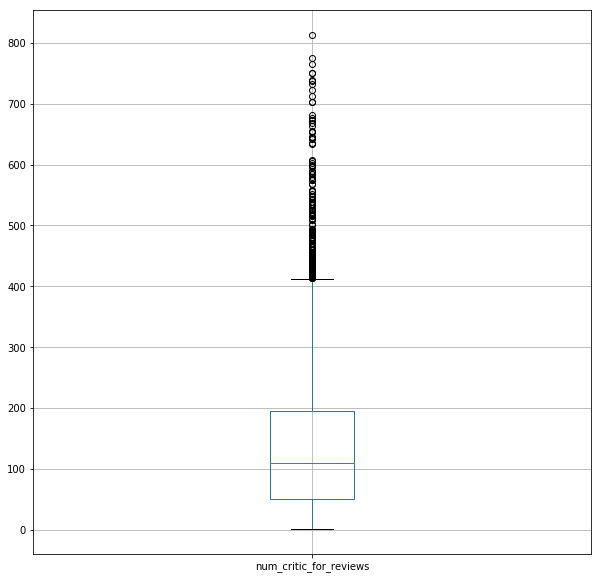

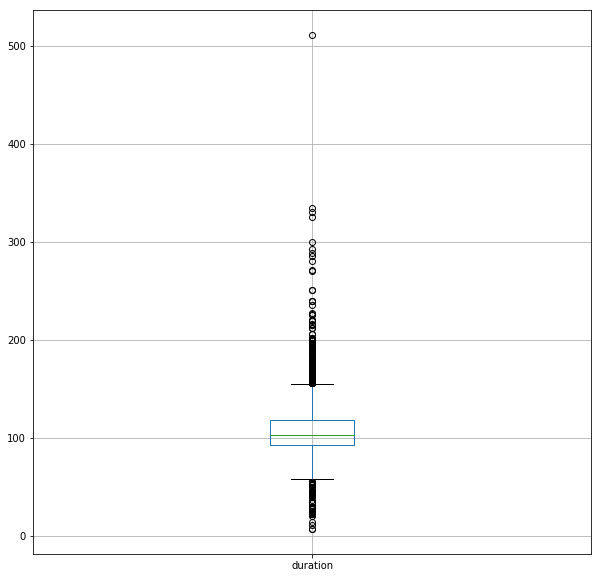

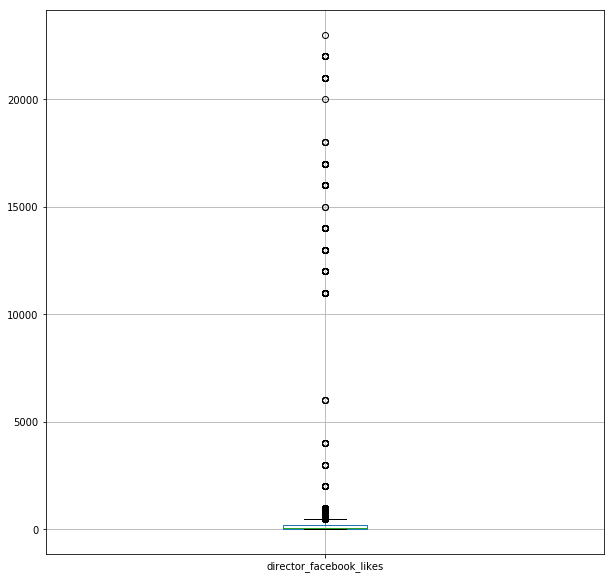

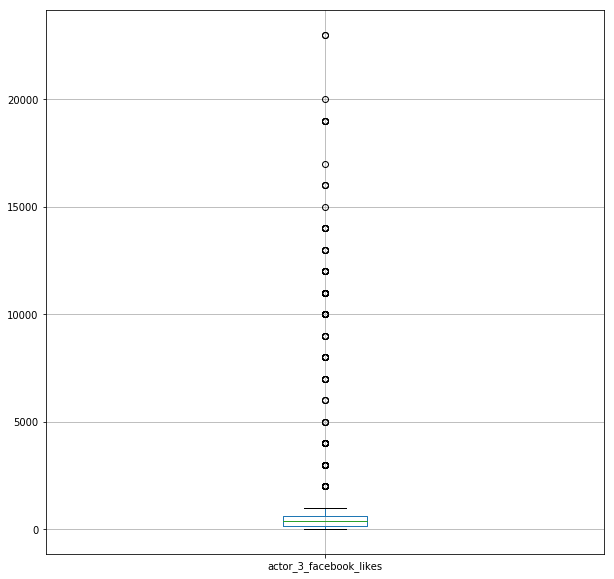

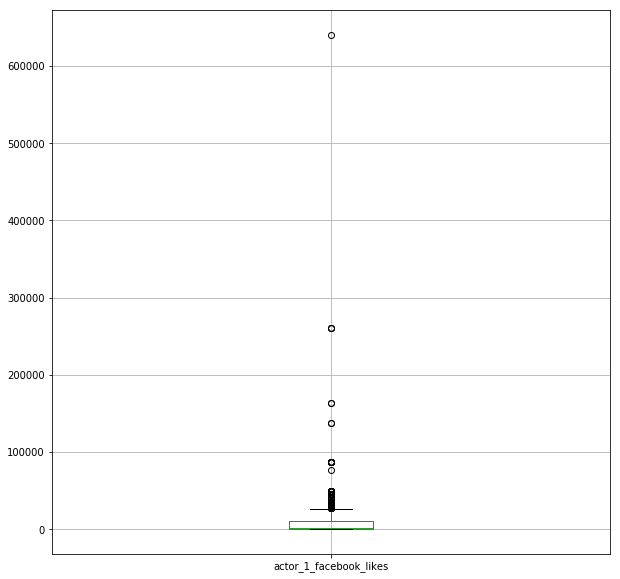

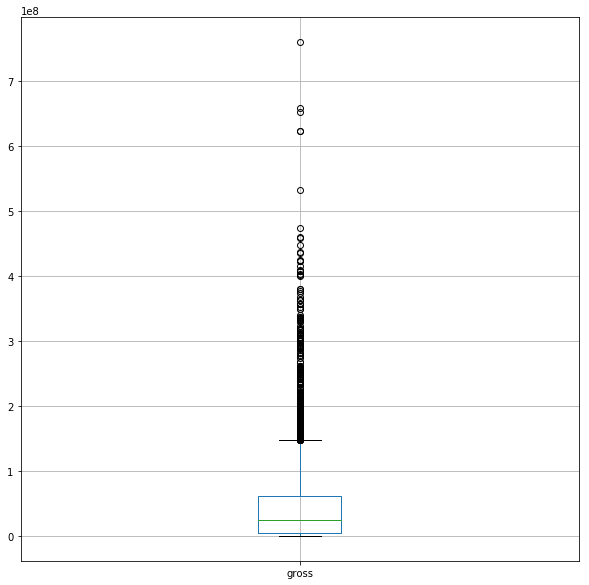

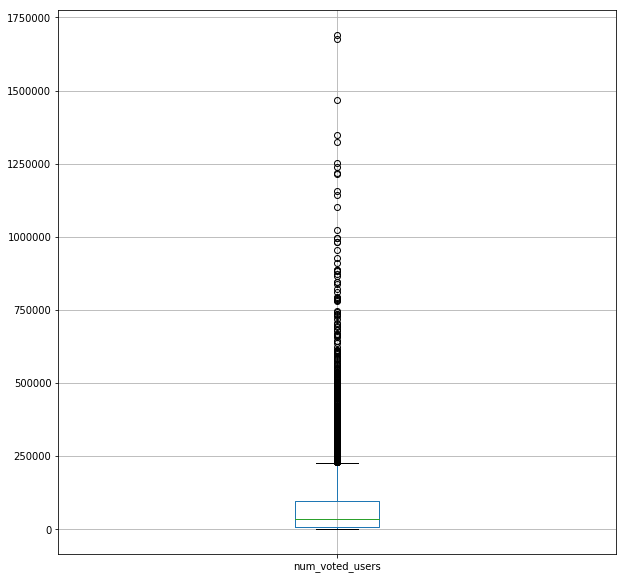

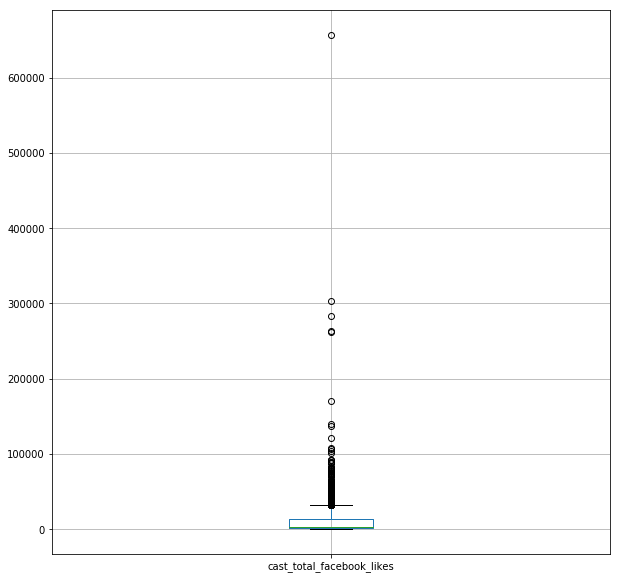

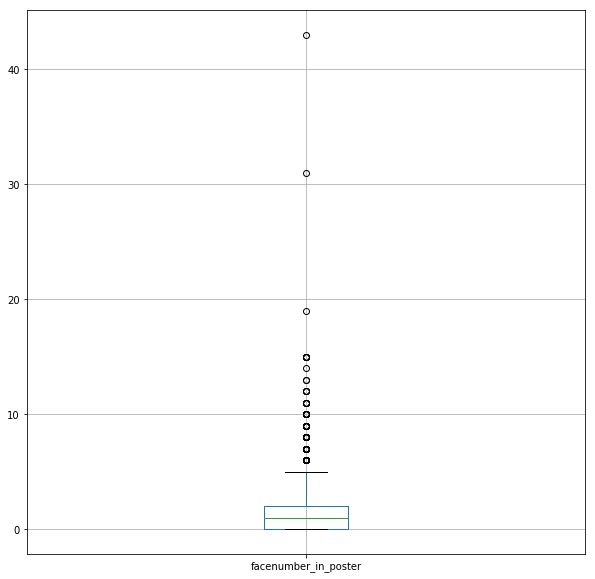

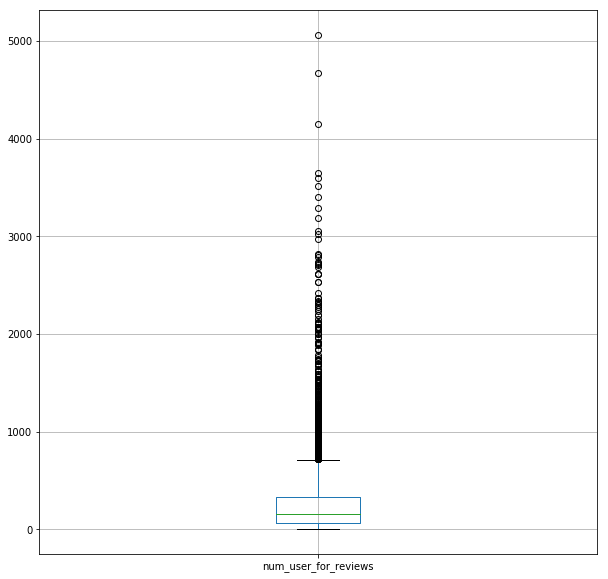

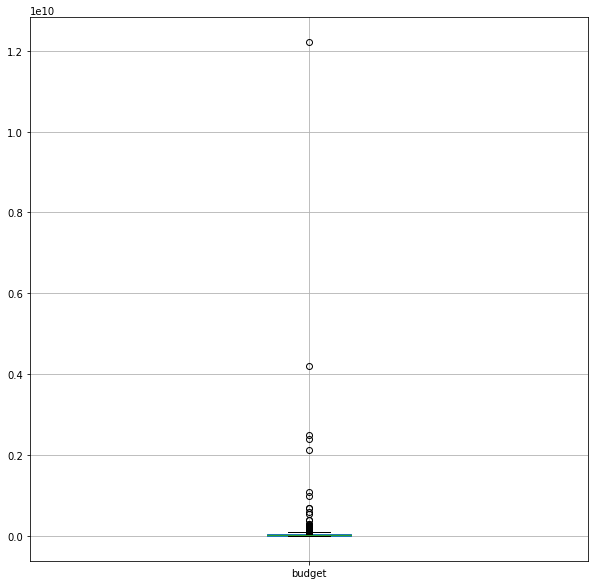

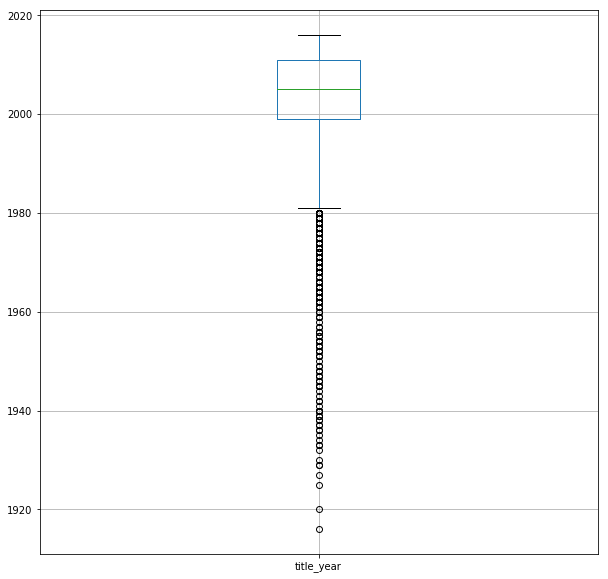

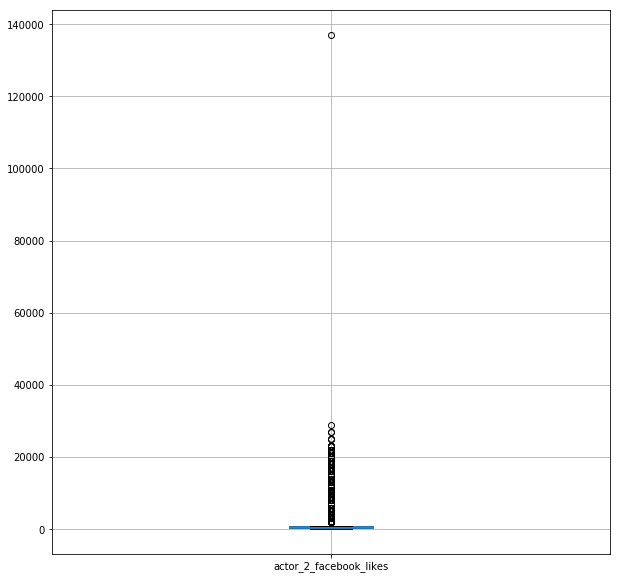

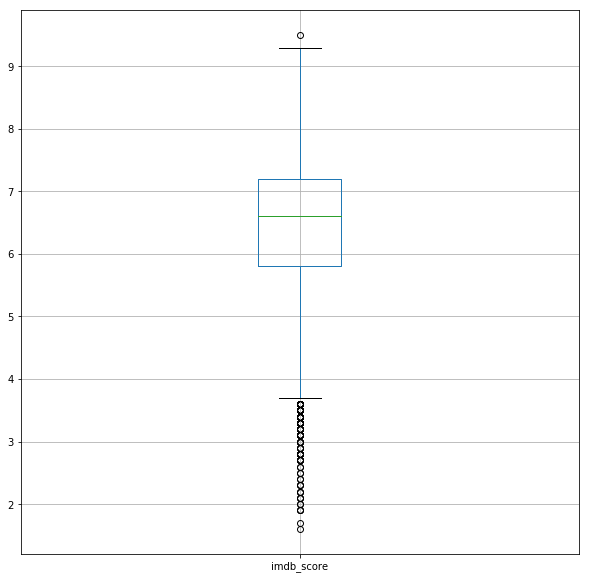

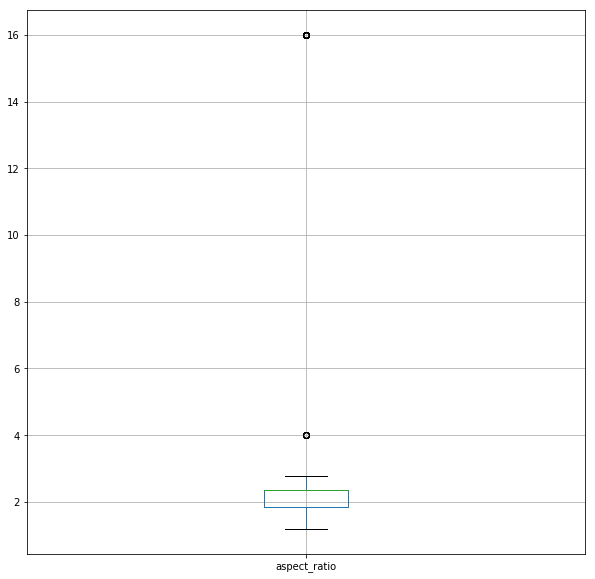

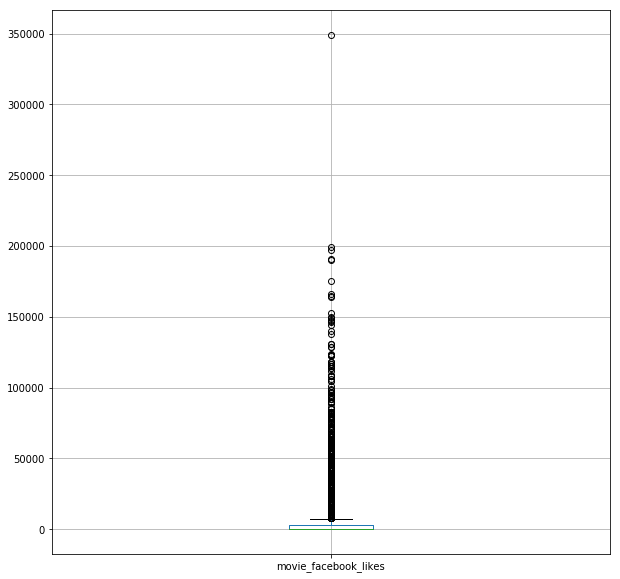

In [4]:
#Code to generate box plots of all the numeric columns

#Box plot gives us an idea on how the values are distributed
#We get an idea in terms of median, varience and number of values that fall beyond 99% region and the skewness
for column in data.select_dtypes(exclude=['object']):
        fig, ax = plt.subplots(figsize=(10,10))
        plt.figure().suptitle(column, fontsize=14, fontweight='bold')
        data.boxplot(column,ax=ax)

plt.show()

# 
From box plots, it is clear that there is a most of the movies share a dominant value and this is highly influencing the plots.

For example, consider the actor 1 facebook likes, most of these columns are filled with zeros due to which a even 49000 would seem like an outlier. 

We see many values which seem like outliers but are not.For example, Commercial blockbusters which collected more than 362 million dollars, movies that are highly rated >8.6 or poorly rated < 4.5

Further, there are columns that do not effect the target.
For example, aspect ratio, movie year etc will not have an impact on the target (imdb scores)

Above numbers are taken from the codes below
#data.actor_1_facebook_likes.quantile(.993)
#data.gross.quantile(.993)
#data.imdb_score.quantile(.993)
#data.imdb_score.quantile(.057)

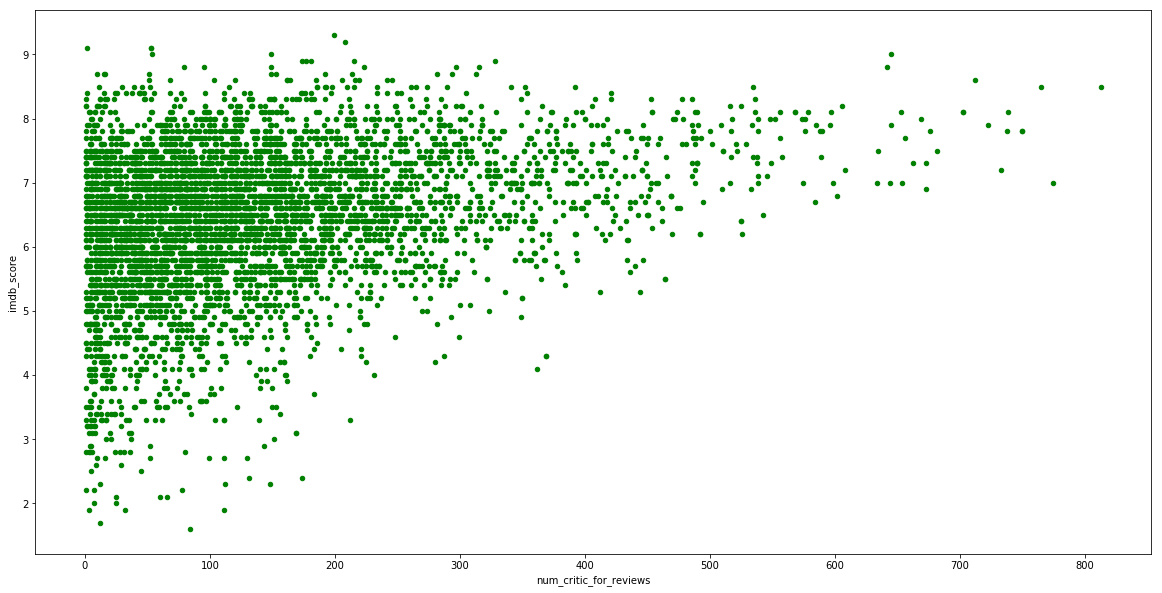

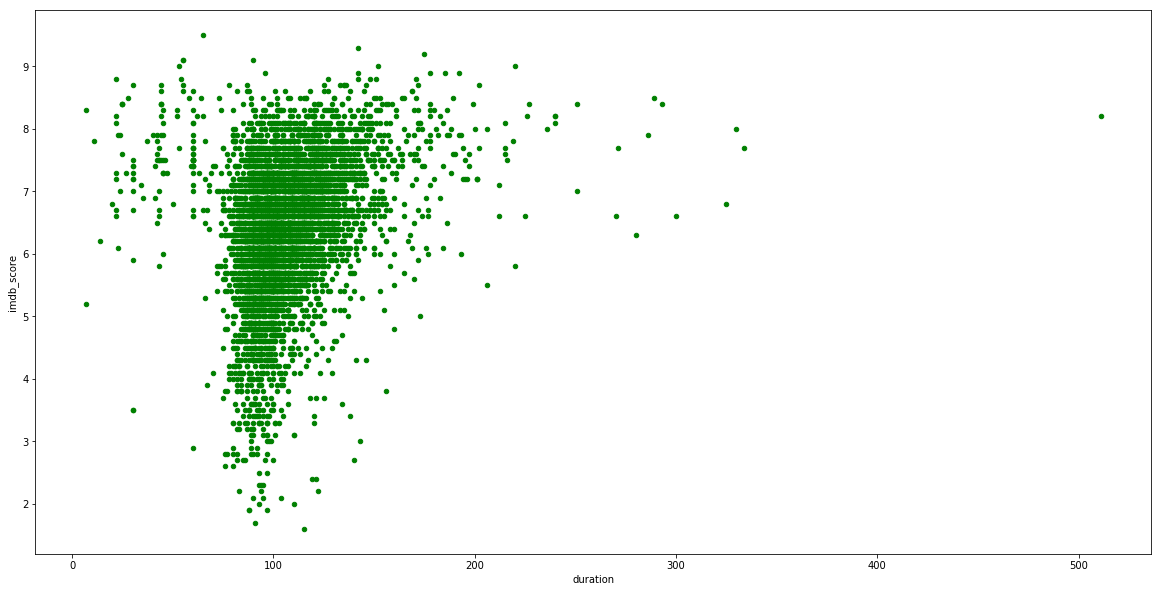

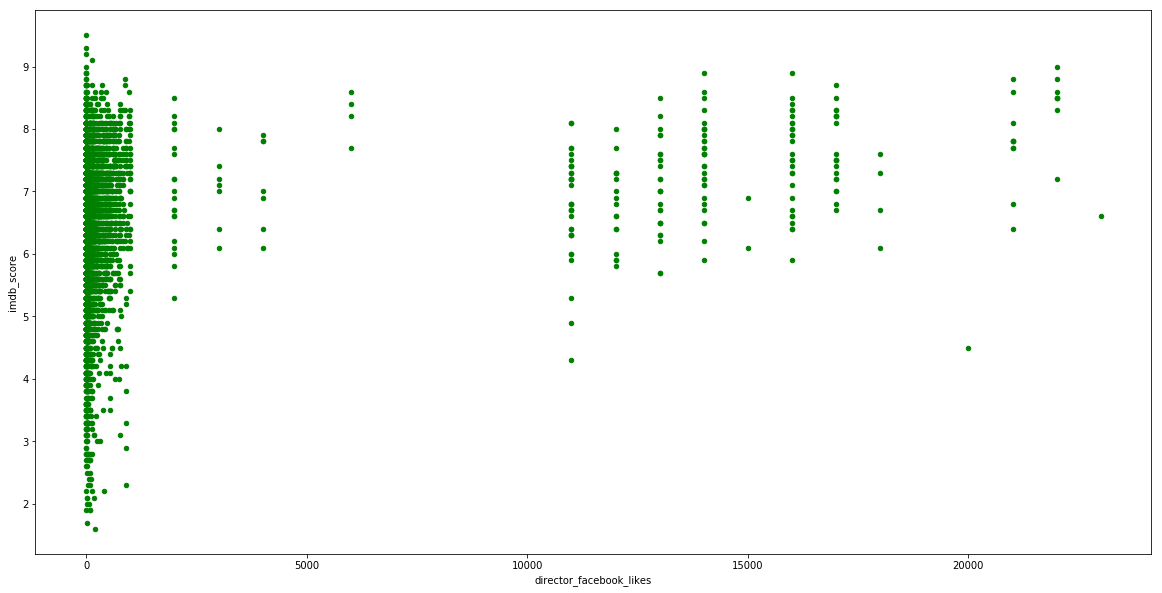

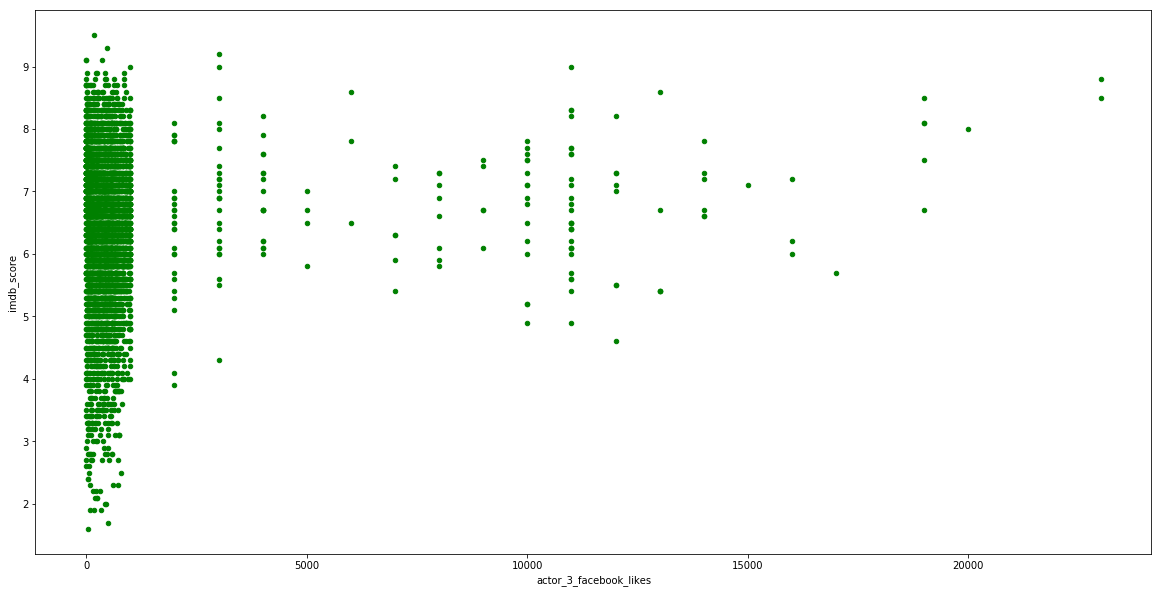

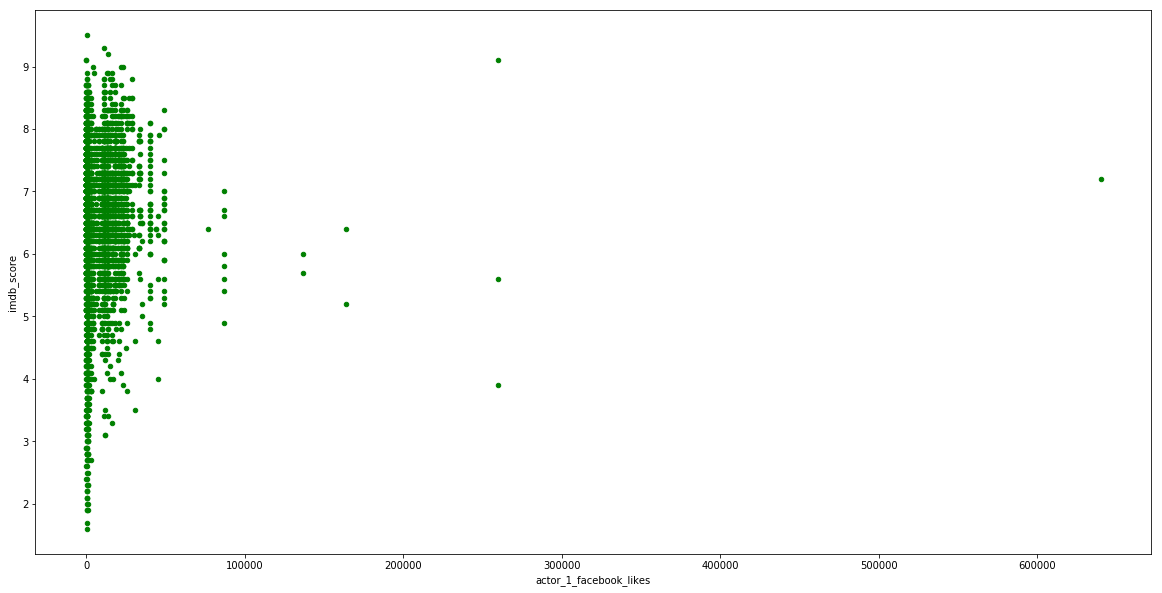

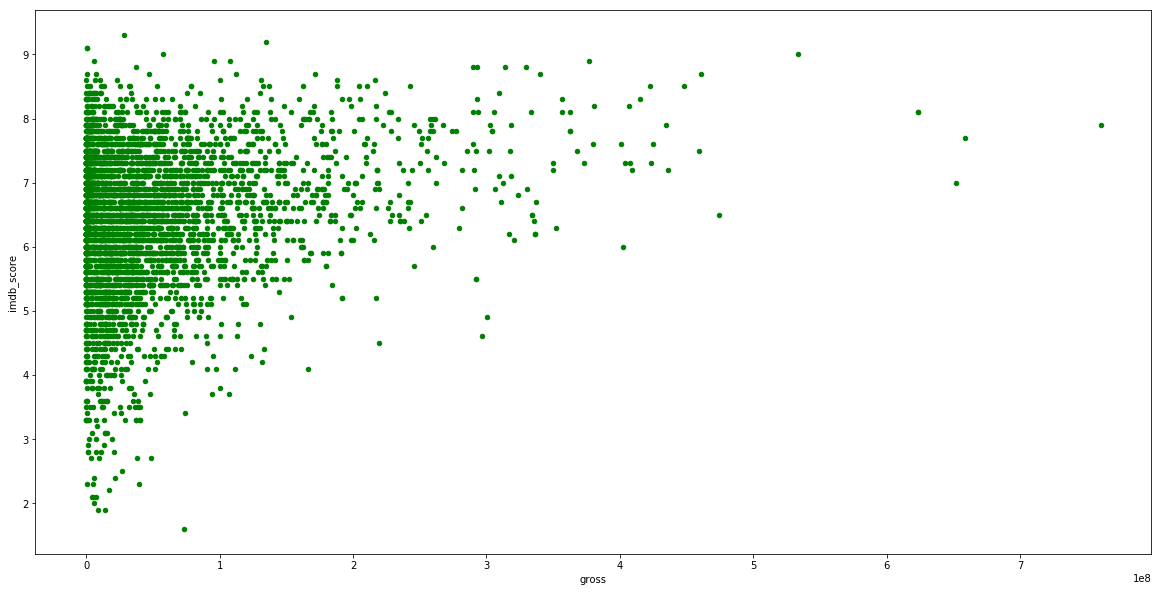

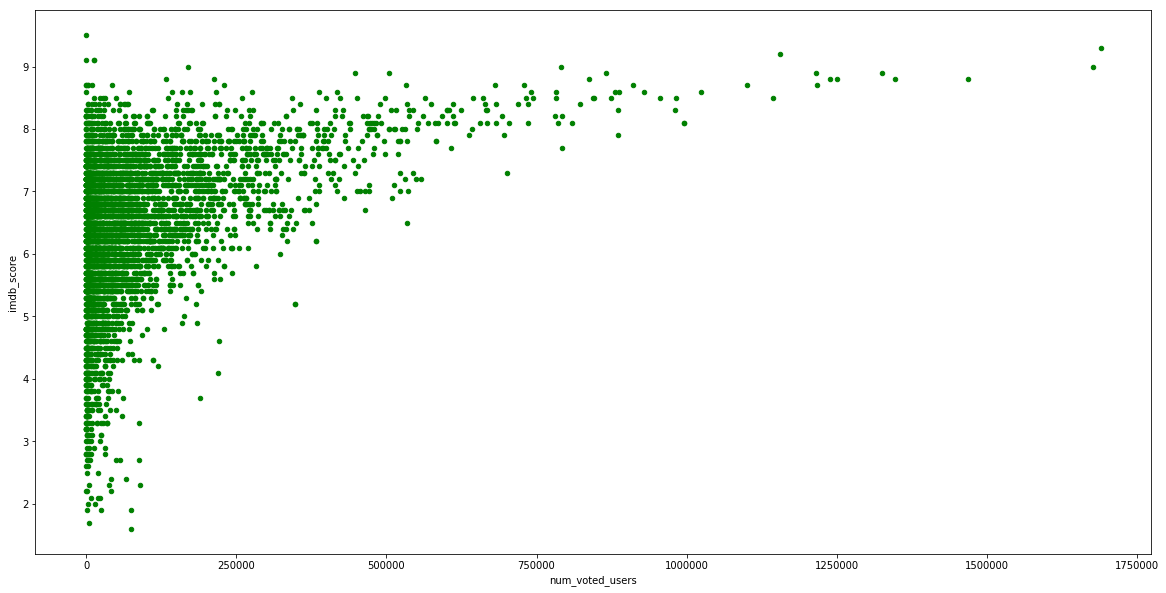

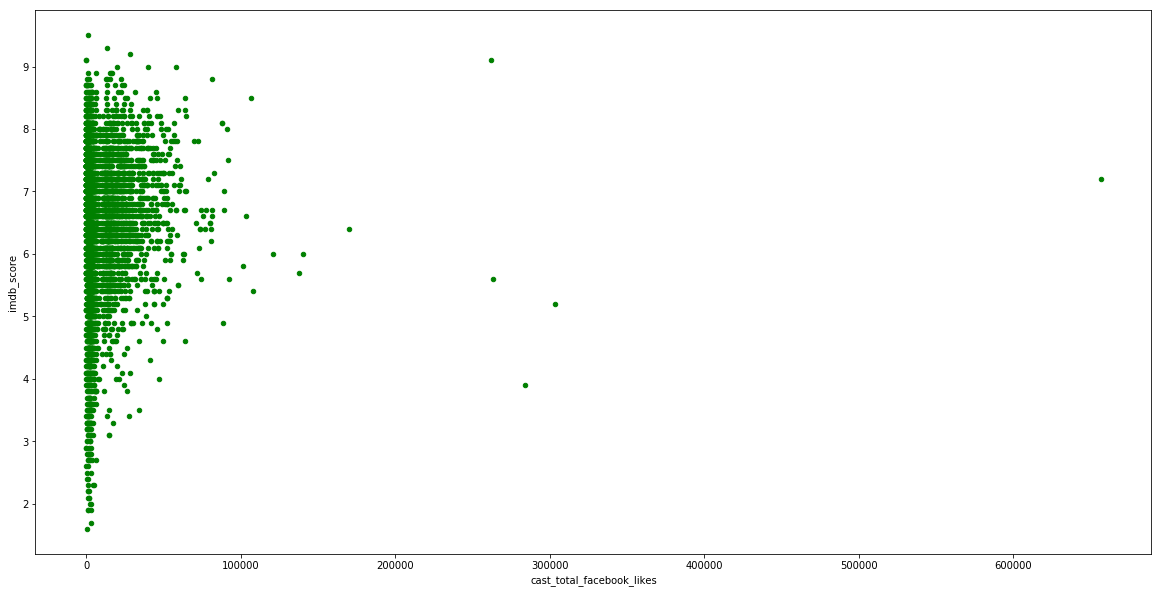

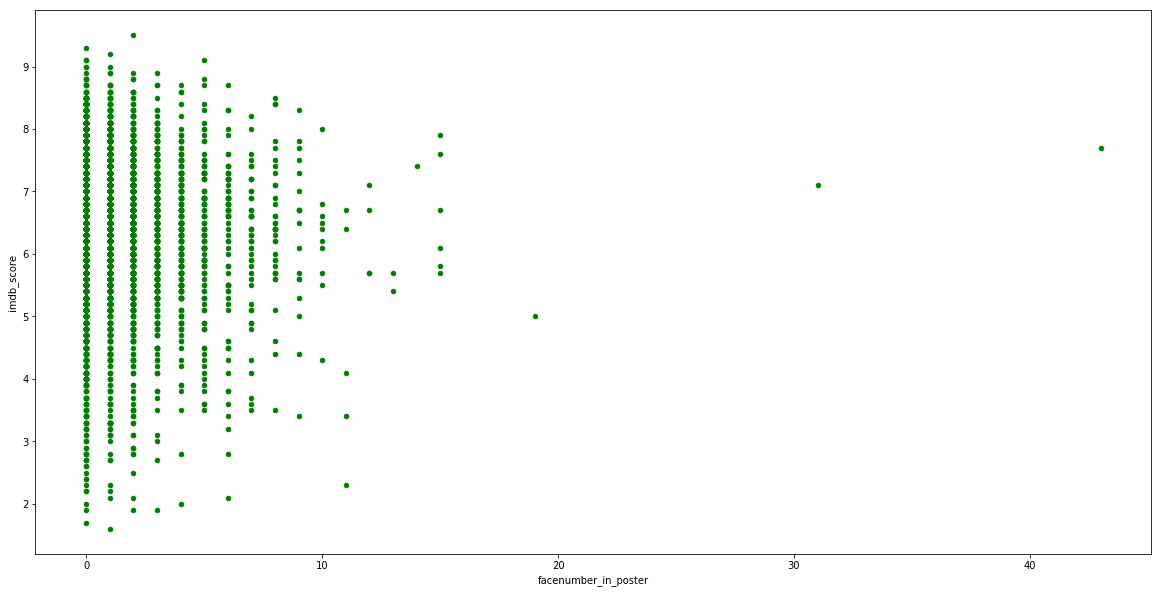

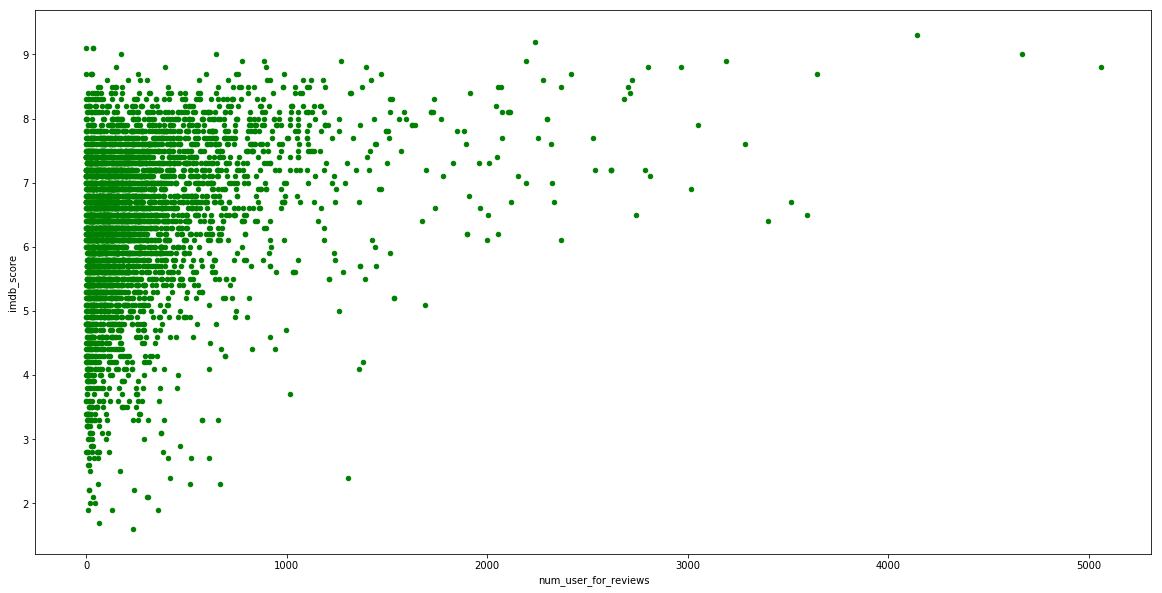

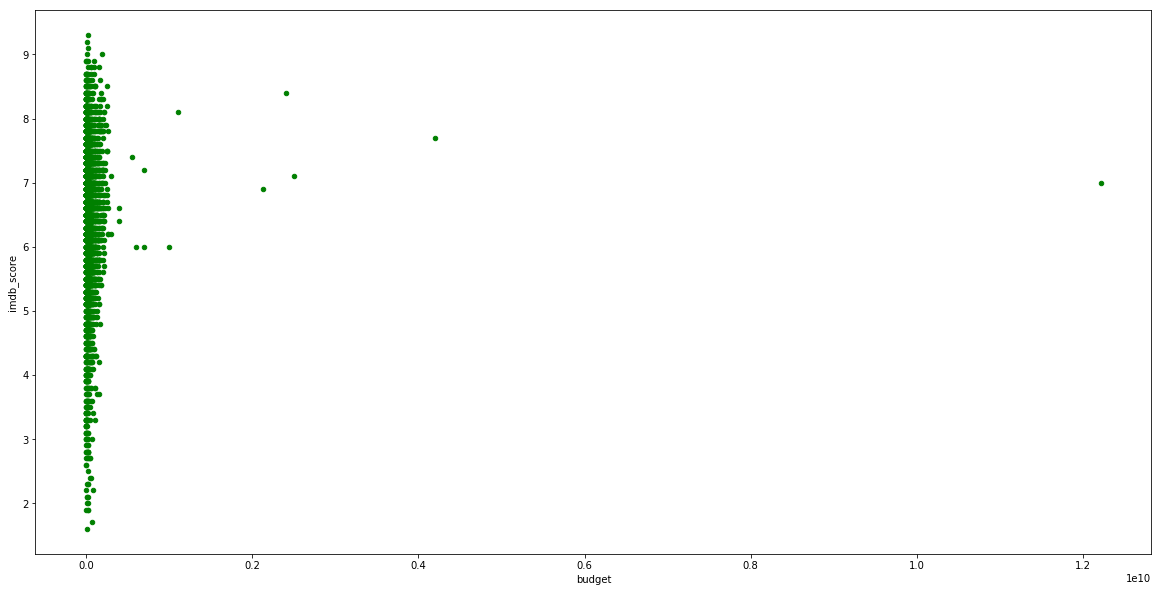

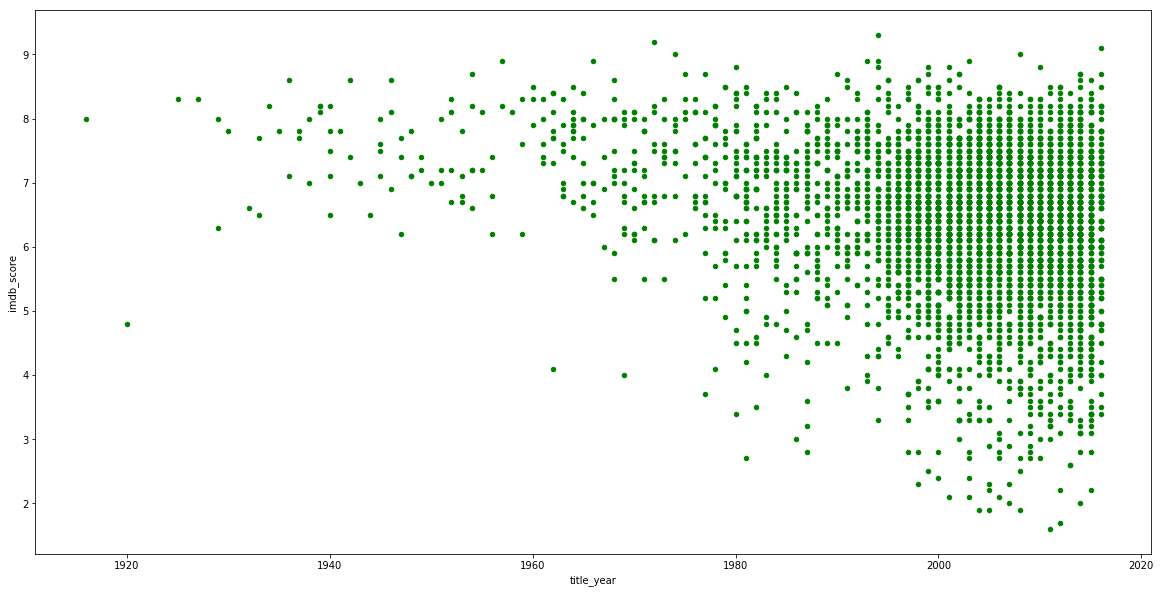

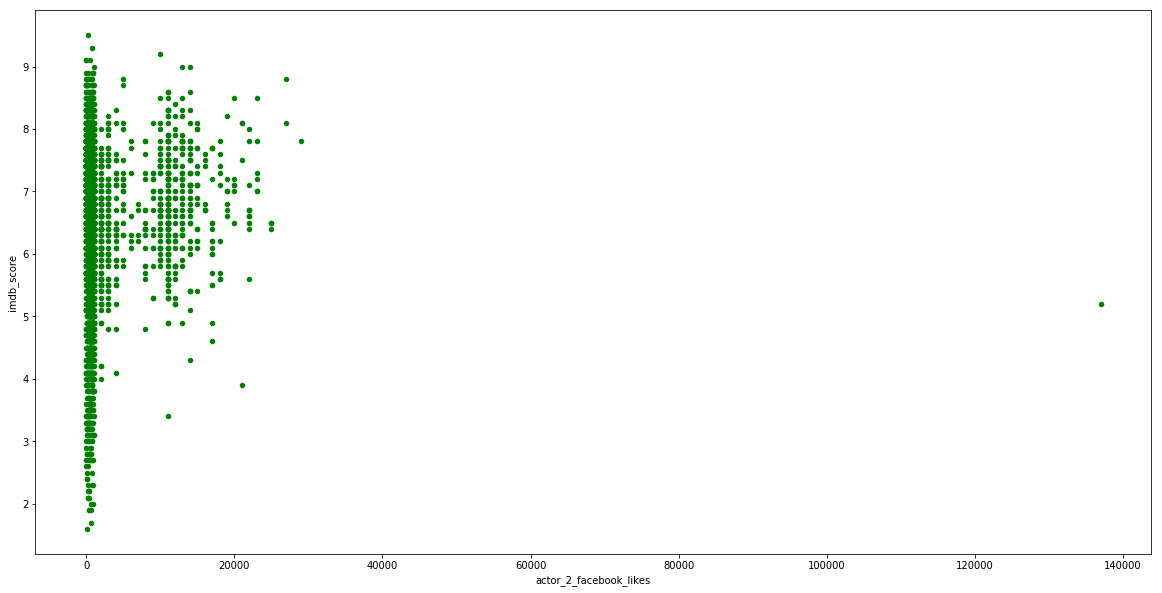

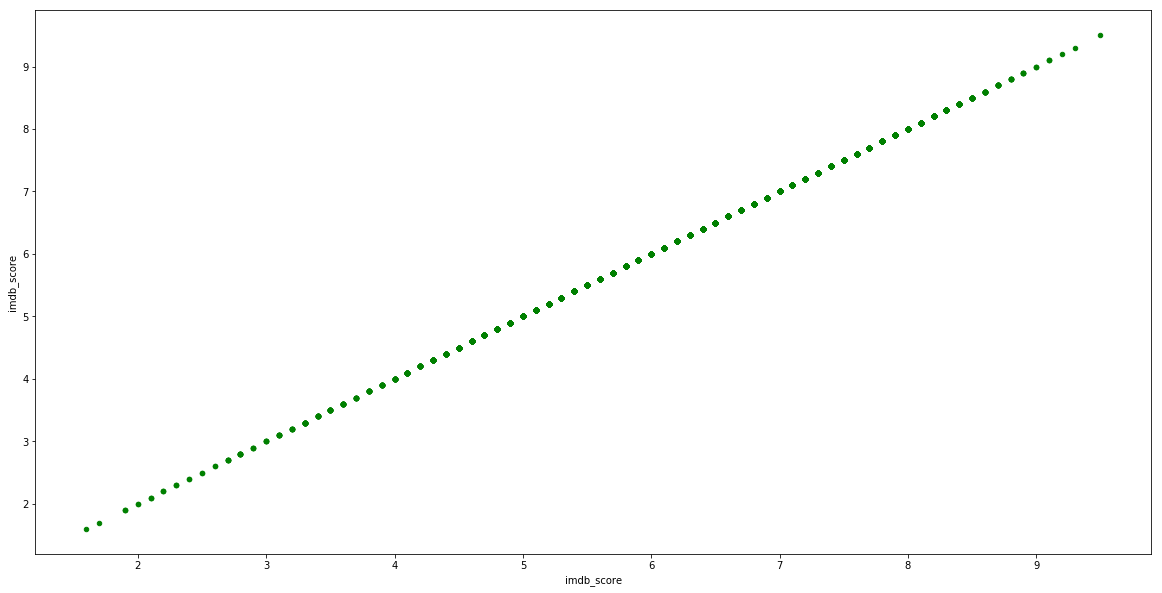

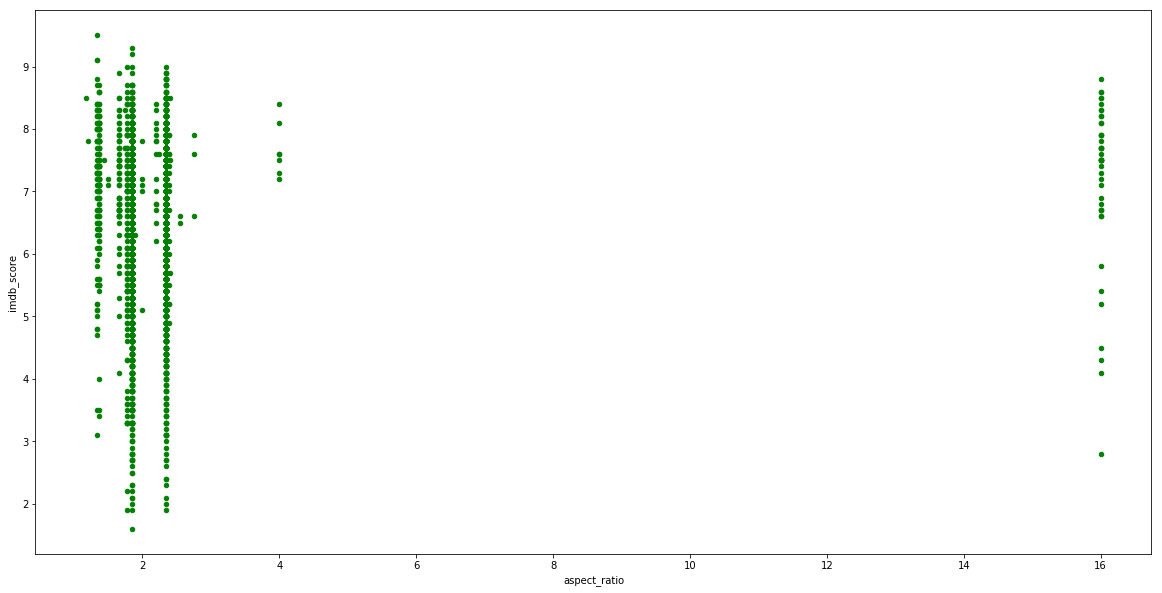

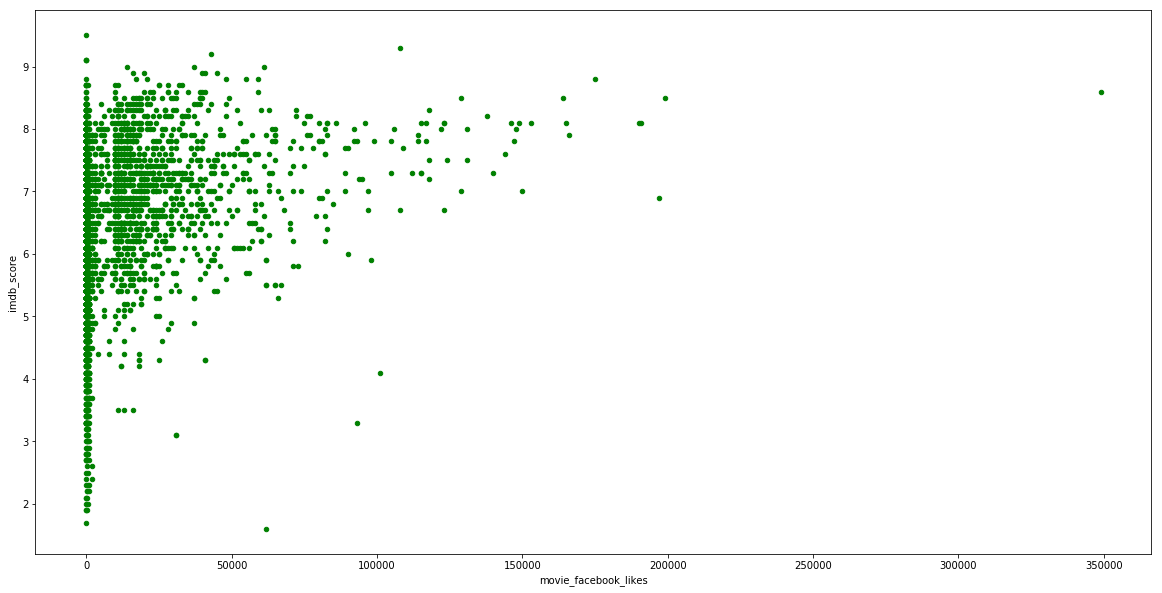

In [5]:
#Code to generate box plots of all the numeric columns

#Box plot gives us an idea on how the values are distributed
#We get an idea in terms of median, varience and number of values that fall beyond 99% region and the skewness
for column in data.select_dtypes(exclude=['object']):
        fig, ax = plt.subplots(figsize=(20,10))
        plt.figure().suptitle(column, fontsize=14, fontweight='bold')
        data.plot(kind='scatter', x=column,y="imdb_score",ax=ax,color='green')

plt.show()

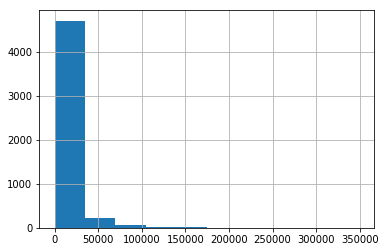

In [6]:
#One way of dealing with this is to bin the data, for example, if we consider the facebook likes
#Histogram of movie_facebook_likes
data.movie_facebook_likes.hist()
plt.show()

In [7]:
#lets bin them based on the decile values of the data
set(pd.qcut(data["movie_facebook_likes"], 10,duplicates='drop'))

{Interval(-0.001, 166.0, closed='right'),
 Interval(166.0, 489.0, closed='right'),
 Interval(489.0, 934.0, closed='right'),
 Interval(934.0, 11000.0, closed='right'),
 Interval(11000.0, 24000.0, closed='right'),
 Interval(24000.0, 349000.0, closed='right')}

In [8]:
data["movie_facebook_likes2"]=pd.cut(data['movie_facebook_likes'],[0,166.0, 489.0, 934.0, 11000.0, 24000.0, 349000.0],labels=False,include_lowest=True)
#pd.value_counts(data.movie_facebook_likes2).to_frame().reset_index()
data.pivot_table(index=["movie_facebook_likes2"], values=["movie_facebook_likes"], aggfunc=('sum','mean','count'),)
#data.loc[(data["movie_facebook_likes"]==0),].sort_values(['movie_facebook_likes'],ascending=True).head(1000)

movie_facebook_likes                        
                                     count          mean       sum
movie_facebook_likes2                                             
0                                     2525     10.687525     26986
1                                      503    324.421471    163184
2                                      504    708.815476    357243
3                                      519   5111.803468   2653026
4                                      505  16833.663366   8501000
5                                      487  53905.544148  26252000

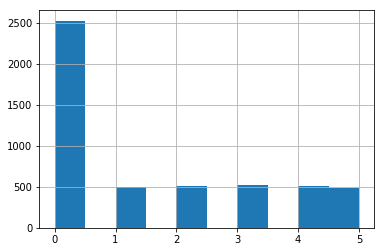

In [9]:
#Histogram of movie_facebook_likes
data.movie_facebook_likes2.hist()
plt.show()

Above is the histogram of binned column for movie facebook likes without o values

facebook likes are binned into five categories The values from left to right indicate lowest to highest category.

In [10]:
#dropping the newly created column movie facebook likes 2
data=data.drop("movie_facebook_likes2",axis=1)

# Target variable 

The target variable is studied, its distribution is analyzed. 

A score difference of 0.4 is seen between two movies of scores 9.2 and 9.6 but they below to the same percentile (>99)
Same difference is seen between movies of rating 6.9 and 7.3 but they fall in  64 percentile and 74 percentile respectively
Also, a movies rated 9.2 and 9.6 can be considered as excellent movies where as a movie with 6.9 rating may be considered an average movie and the movie with 7.3 may be considered a good movie. 

Increment in target prediction may or may not be significant and is dependent on the level of predicted target

Hence it is recommended to categorize movies into bins such as bad, average, good and excellent.
This converts the target into categorical with 4 levels 


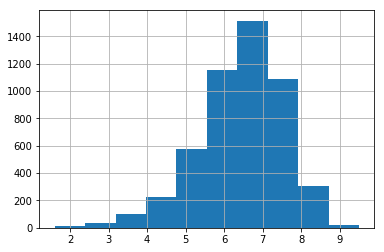

In [11]:
#Histogram of target
data.imdb_score.hist()
plt.show()

In [12]:
#Imdb scores are distributed around mean of 6.44
print("Mean: %s" %(data.imdb_score.mean()))
print("Standard deviation: %s" %(data.imdb_score.std()))
print("Median: %s"%(data.imdb_score.median()))
print("Mode: %s"%(data.imdb_score.mode()))
print("25th percentile: %s"%(data.imdb_score.quantile(.25)))
print("50th percentile: %s"%(data.imdb_score.quantile(.50)))
print("75th percentile: %s"%(data.imdb_score.quantile(.75)))
#These values can be used to categorize the score into bad,average,good and excellent categories

Mean: 6.4421376165
Standard deviation: 1.12511586573
Median: 6.6
Mode: 0    6.7
dtype: float64
25th percentile: 5.8
50th percentile: 6.6
75th percentile: 7.2


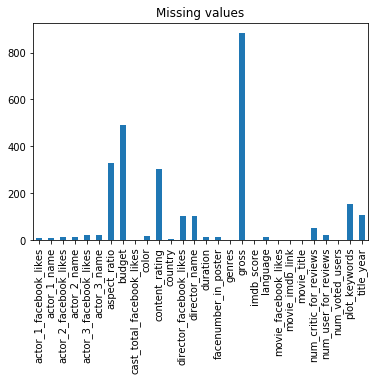

In [13]:
#missing values in numeric columns
new={}
for column in data.columns:
    new[column]=pd.value_counts(pd.isnull(data[column]).values, ascending=True,bins=2).values[0]

pd.Series(new).plot(kind="bar",title="Missing values")
plt.show()

Note: Gross, budget, facebook like columns have some of the missing data and must be considered while building a model

In [14]:
#let is study the categorical features and determine the number of levels each feature has
for column in data.select_dtypes(include=['object']):
        print("%s : %s " %(column,len(set(data[column]))))

color : 3 
director_name : 2399 
actor_2_name : 3033 
genres : 914 
actor_1_name : 2098 
movie_title : 4917 
actor_3_name : 3522 
plot_keywords : 4761 
movie_imdb_link : 4919 
language : 48 
country : 66 
content_rating : 19 


Features with large number of levels do not help in predicting the target, this leaves country, content rating, language, color for further analysis
Also, the plot key words and the genere are delimited with "|", breaking them and determining the first of these columns will help significantly in reducing the levels.

Plot key words talk about the synopsis of the movie 

Unfortunately, genres are placed in alphabetical order and the first genre extracted would be of alphabetical level than the genre level. For example Avatar is Action|Adventure|Fantasy|Sci-Fi but there is no way to extract the major genre of this movie.
However, we can count the number of genres of the movie and use it as a feature

We cannot use movie title but we can count the length of the title in turms of number of words. Also, it would be interesting to determine of the first alphnumeric of the movie title is significant.


In [15]:
data["genres_count"]=data.genres.str.split('|', 0).apply(lambda x: len(x))
data["plotkeyword_1"],data["plotkeyword_others"]=data.plot_keywords.str.split('|', 1).str
data["title_num_words"]=data.movie_title.str.split(' ', 0).apply(lambda x: len(x))
data["title_first_alpha_numeric"]=pd.DataFrame(data.movie_title.str.split(' ',1).tolist(),columns = ['first','other'])["first"].str[0]
#data.loc[:,["movie_title","genres","plot_keywords","genres_count","plotkeywords_count","plotkeyword_1","movie_title_word_length","movie_first_alpha_numeric"]]

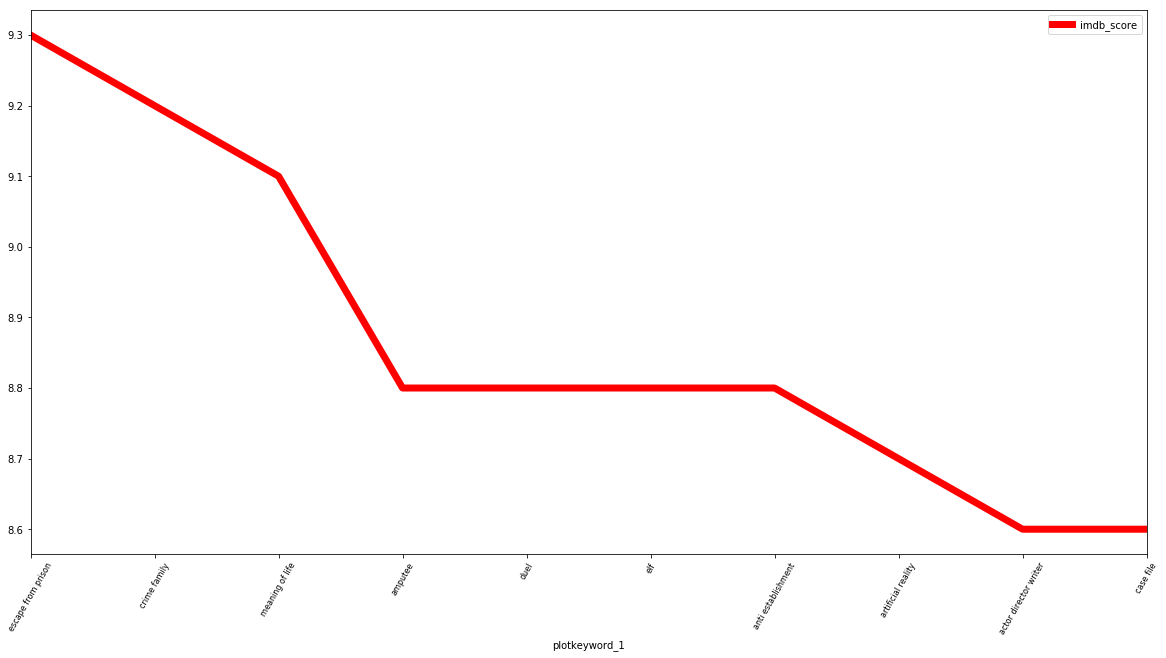

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
pivot=data.pivot_table(index=["plotkeyword_1"], values=["imdb_score"], aggfunc=np.mean).sort_values(['imdb_score'],ascending=False).head(10)
p=pivot.plot(kind="line",color="red",label=pivot,ax=ax,linewidth=7.0)
p.set_xticklabels(p.get_xticklabels(), rotation = 60, fontsize = 8)
plt.show()


#data.pivot_table(index=["plotkeyword_1"], values=["imdb_score"], aggfunc=('mean','count')).imdb_score.sort_values(['mean'],ascending=False).head(20)

It is interesting to note that crime related movies with plot words such as crime family, escape from prison, anto establishment etc are among the top rated 

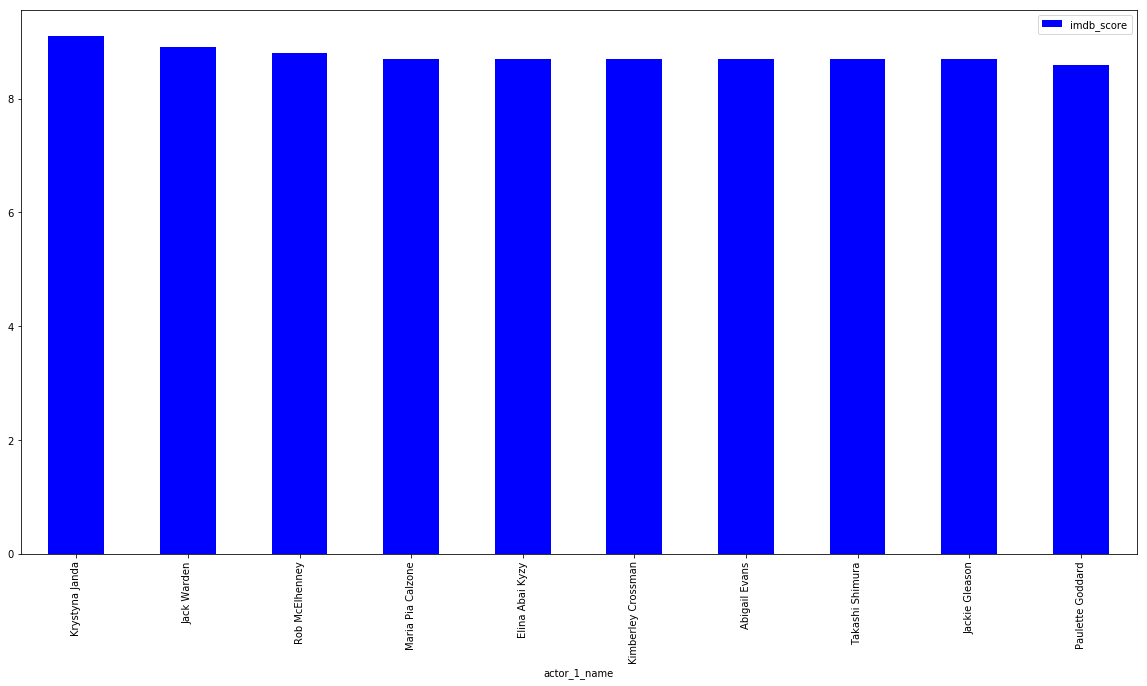

In [17]:
#average imdb scores of top ten actors (by imdb rating)
fig, ax = plt.subplots(figsize=(20,10))
pivot=data.pivot_table(index=["actor_1_name"], values=["imdb_score"], aggfunc=np.mean).sort_values(['imdb_score'],ascending=False).head(10)
pivot.plot(kind="bar",color="b",label=pivot,ax=ax) 
plt.show()

In [18]:
#Actor's names could be used in determining the target, however, traditional models cannot use 2098 categorical terms
#One approch is to use Tensorflow hybrid model 
#Other approach is to categorize the actors into 4 categories and use that as a feature 
len(data.actor_1_name.unique())

2098

In [19]:
# Black and white movies are doing better than the color
data.pivot_table(index=["color"], values=["imdb_score"], aggfunc=np.mean)

,imdb_score
color,
Black and White,7.227273
Color,6.409533


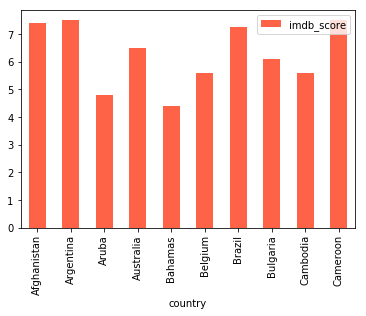

In [20]:
pivot=data.pivot_table(index=["country"], values=["imdb_score"], aggfunc=np.mean).head(10)
pivot.plot(kind="bar",color="tomato",label=pivot)
plt.show()

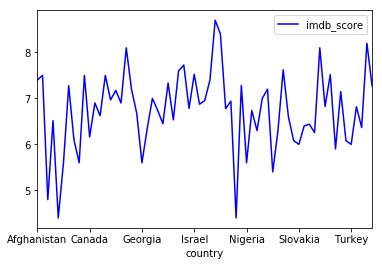

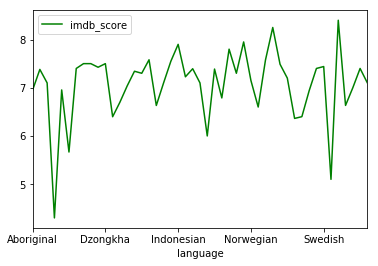

In [21]:
#It is evident that there are multiple we must neglect some of these numeric columns
#fig, ax = plt.subplots(figsize=(20,10))
pivot=data.pivot_table(index=["country"], values=["imdb_score"], aggfunc=np.mean,)
pivot.plot(kind="line",color="b",label=pivot)
pivot2=data.pivot_table(index=["language"], values=["imdb_score"], aggfunc=np.mean,)
pivot2.plot(kind="line",color="g",label=pivot)
plt.show()

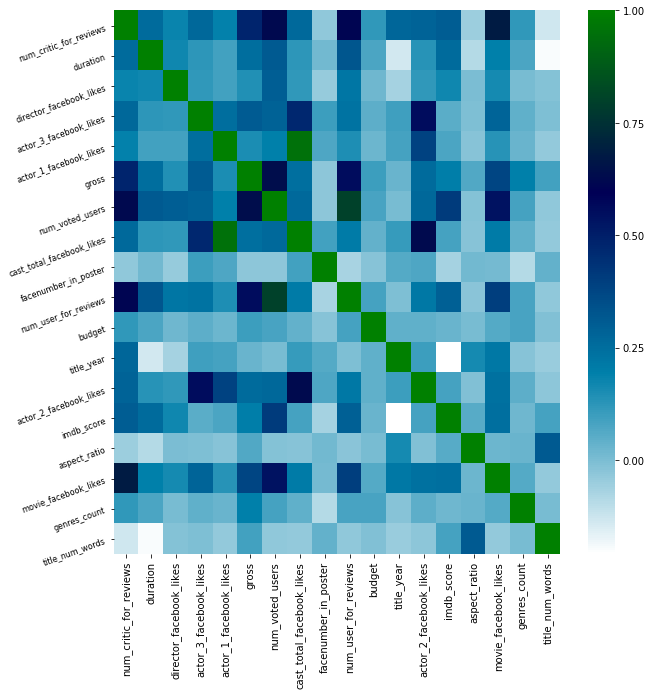

In [22]:
#Code to generate heat map to find correlation
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))   
g=sns.heatmap(data.corr(), xticklabels=list(data.corr().columns.values), yticklabels=data.corr().columns.values,cmap="ocean_r",ax=ax)
g.set_yticklabels(g.get_xticklabels(), rotation = 60, fontsize = 8)
g.set_yticklabels(g.get_yticklabels(), rotation = 20, fontsize = 8)
plt.show()


Movie face book likes is positively correlated with critics review, number of voted users and user reviews, this indicates that popular movie. The relation with popular movies and imdb score is positive

Imdb scores is positively correlated with duration,director facebook likes,number of critic reviews and number of voted users with a moderate strength signal
Imdb scores are slightly positively correlated with actor 1 facebook likes,gross,movie facebook likes

Cast facebook likes= actor_1 likes+ actor_2 likes +actor_3+director likes and so son .This could lead to multi correlation when all the columsn are used. Hence we do not use cast facebook likes. Similarly, we remove numeber of user reviews and movie facebook likes
This code shows the histogram of difference between cast total likes and actors+directors likes and is highly concentrated around 0  
#(data.cast_total_facebook_likes-data.actor_1_facebook_likes-data.actor_2_facebook_likes-data.actor_3_facebook_likes-data.director_facebook_likes).hist()
plt.show()


It is intresting to know that older movies have better scoring than newer films .
Also, as the number of faces in the posters increases, the rating decreases but the signal is week.

Newly created features do not have strong signal, genres count,plot keywords count and title word length are slightly positively correlated with the target



In [23]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_count,title_num_words
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176,0.119718,-0.133080
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605,0.078758,-0.197906
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048,0.004577,-0.015294
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844,0.044494,-0.002531
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348,0.028259,-0.034592
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082,0.192709,0.088987
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924,0.083983,-0.030421
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786,0.042597,-0.034478
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918,-0.087846,0.038098
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594,0.081727,-0.033083


In [24]:
data.corr().loc["imdb_score"]

num_critic_for_reviews       0.305303
duration                     0.261662
director_facebook_likes      0.170802
actor_3_facebook_likes       0.052633
actor_1_facebook_likes       0.076099
gross                        0.198021
num_voted_users              0.410965
cast_total_facebook_likes    0.085787
facenumber_in_poster        -0.062958
num_user_for_reviews         0.292475
budget                       0.030688
title_year                  -0.209167
actor_2_facebook_likes       0.083808
imdb_score                   1.000000
aspect_ratio                 0.059445
movie_facebook_likes         0.247049
genres_count                 0.018484
title_num_words              0.087265
Name: imdb_score, dtype: float64

Note for building the model

Target is to be converted into bins of "bad, average, good and excellent"

Imdb scores is positively correlated with duration,director facebook likes,number of voted users. Imdb scores are slightly correlated with actor 1 facebook likes,gross,movie facebook likes

1.Features such as aspect ratio can be neglected as they have no effect on rating, it is intresting to know that older movies have better scoring than newer films

2.These numeric columns cannot be used in building the model, techniques like binning, regularizations must be used

Further analysis is to be done on categorical features

In [25]:
data["imdb_score2"]=pd.cut(data['imdb_score'],[0,5.8,6.6,7.2,10],labels=False).astype("object")
data.select_dtypes(include=['object']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).loc["imdb_score2"]

color                       -0.142983
director_name                0.113205
actor_2_name                -0.005780
genres                      -0.013380
actor_1_name                 0.016284
movie_title                 -0.039598
actor_3_name                -0.019958
plot_keywords               -0.064100
movie_imdb_link             -0.039758
language                    -0.125131
country                     -0.088387
content_rating              -0.149059
plotkeyword_1               -0.029621
plotkeyword_others          -0.064301
title_first_alpha_numeric    0.020269
imdb_score2                  1.000000
Name: imdb_score2, dtype: float64

When we converted the target into ordinal variable and tested the correlation with the factorized categorical variables.
We see that director name,color, language and content rating are slightly correlated with the target 

# VIF

In [26]:
#Let us now study the VIF in the data
#For this we need to build a MLR model and observe the VIF of every feature
#Target is the imdb_score column

import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\Pavan\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
data = pd.read_csv('C:\\Users\\Pavan\\Desktop\\rang\\movie_rating_prediction-master\\movie_metadata.csv', sep=',',header=0,encoding='latin-1')
data["genres_count"]=data.genres.str.split('|', 0).apply(lambda x: len(x))
data["plotkeyword_1"],data["plotkeyword_others"]=data.plot_keywords.str.split('|', 1).str
data["title_num_words"]=data.movie_title.str.split(' ', 0).apply(lambda x: len(x))
data["title_first_alpha_numeric"]=pd.DataFrame(data.movie_title.str.split(' ',1).tolist(),columns = ['first','other'])["first"].str[0]
#data.loc[:,["movie_title","genres","plot_keywords","genres_count","plotkeywords_count","plotkeyword_1","movie_title_word_length","movie_first_alpha_numeric"]]


In [28]:
#Building the model
data = data._get_numeric_data() 
data=data.dropna()
features=data.columns.tolist()
features.remove("imdb_score")
y, X = dmatrices("imdb_score ~ num_critic_for_reviews + duration + director_facebook_likes + actor_3_facebook_likes + actor_1_facebook_likes + gross + num_voted_users +cast_total_facebook_likes + facenumber_in_poster+num_user_for_reviews+budget+title_year+actor_2_facebook_likes+aspect_ratio+movie_facebook_likes+genres_count+title_num_words", data, return_type='dataframe')

In [29]:
#Determining the VIF of each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,59328.4,Intercept
1,3.1,num_critic_for_reviews
2,1.3,duration
3,1.1,director_facebook_likes
4,8.6,actor_3_facebook_likes
5,213.8,actor_1_facebook_likes
6,2.0,gross
7,3.7,num_voted_users
8,322.9,cast_total_facebook_likes
9,1.1,facenumber_in_poster


# 

Eventhough, we saw correlation between IMDB scores and the facebook likes, only director facebook likes and movie facebook likes have VIF<2.5

Similarly, number of critic review and number of voted users must not be considered to build the model


In [30]:
#PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
#Code to read the data
data = pd.read_csv('C:\\Users\\Pavan\\Desktop\\rang\\movie_rating_prediction-master\\movie_metadata.csv', sep=',',header=0,encoding='latin-1')
data["genres_count"]=data.genres.str.split('|', 0).apply(lambda x: len(x))
data["plotkeyword_1"],data["plotkeyword_others"]=data.plot_keywords.str.split('|', 1).str
data["title_num_words"]=data.movie_title.str.split(' ', 0).apply(lambda x: len(x))
data["title_first_alpha_numeric"]=pd.DataFrame(data.movie_title.str.split(' ',1).tolist(),columns = ['first','other'])["first"].str[0]
#data.loc[:,["movie_title","genres","plot_keywords","genres_count","plotkeywords_count","plotkeyword_1","movie_title_word_length","movie_first_alpha_numeric"]]
data["imdb_score2"]=pd.cut(data['imdb_score'],[0,5.8,6.6,7.2,10],labels=["bad","avg","good","excellent"]).astype("object")
data=data.dropna(axis=0, how='any')
data=data.drop("imdb_score",1)

In [32]:
Y=data.pop("imdb_score2")
X=data.select_dtypes(exclude=['object'])

X=StandardScaler().fit_transform(X)

In [33]:
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = data.select_dtypes(exclude=['object']).columns)
for i,pc in enumerate(pca.explained_variance_ratio_):
    print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))

print pd.DataFrame(pca.components_,columns=data.select_dtypes(exclude=['object']).columns)
df=pd.DataFrame(principalComponents).join(Y)
df.to_csv("PCA_output.csv")
#Currently, Models are not using Principal components as inputs


1.	25.25%
2.	12.19%
3.	8.64%
4.	6.69%
5.	6.35%
6.	6.17%
7.	5.68%
8.	5.34%
9.	5.03%
10.	4.59%
11.	3.85%
12.	2.80%
13.	2.57%
14.	2.43%
15.	1.42%
16.	1.01%
17.	0.01%
    num_critic_for_reviews  duration  director_facebook_likes  \
0                 0.367040  0.197728                 0.153308   
1                -0.209224 -0.157362                -0.086910   
2                -0.291594  0.253930                 0.227531   
3                -0.077639  0.048917                -0.118680   
4                -0.021428 -0.100157                -0.374035   
5                -0.118585  0.570626                 0.141111   
6                -0.007942  0.039839                 0.042703   
7                 0.066950 -0.036891                 0.090911   
8                 0.025773  0.176023                -0.789518   
9                 0.053663 -0.216363                 0.291780   
10                0.158715  0.532073                -0.079210   
11                0.067399 -0.405804                -0.08